[View in Colaboratory](https://colab.research.google.com/github/shashank2806/mnist-digits-classifiers/blob/master/linear_model.ipynb)

##Imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [33]:
import os
work_dir = "/content/mnist-digits-classifiers/" 
if os.getcwd() != work_dir:
  !git clone https://github.com/shashank2806/mnist-digits-classifiers
os.chdir(work_dir)

fatal: destination path 'mnist-digits-classifiers' already exists and is not an empty directory.


In [0]:
from mnist import MNIST
data = MNIST(data_dir="data/MNIST/")

In [35]:
print("Size of:")
print("- Training-set:\t\t{}".format(data.num_train))
print("- Validation-set:\t{}".format(data.num_val))
print("- Test-set:\t\t{}".format(data.num_test))

Size of:
- Training-set:		55000
- Validation-set:	5000
- Test-set:		10000


##process data

In [36]:
#shape of each image
img_shape = data.img_shape
img_shape

(28, 28)

In [37]:
#flattened img size 28*28, stored in 1D array
img_size_flat = data.img_size_flat

img_size_flat

784

In [38]:
#number of classes in dataset
num_classes = data.num_classes
num_classes

10

###Visualising one hot encoding of labels

In [39]:
#select top 5 rows of y_test labels
data.y_test[:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [40]:
#correct output label classes for each image
data.y_test_cls[:5]

array([7, 2, 1, 0, 4])

##Helper function for ploting images

In [0]:
# https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/01_Simple_Linear_Model.ipynb
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

##Plot few images

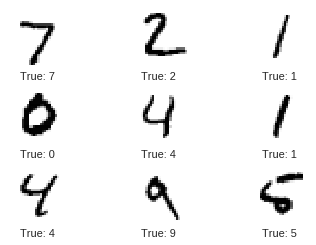

In [42]:
#first few images of test set
images = data.x_test[0:9]
#get true classes of those images
cls_true = data.y_test_cls[0:9]
plot_images(images, cls_true)

##TensorFlow graph

* Placeholder variables used to feed input into the graph.
* Model variables that are going to be optimized so as to make the model perform better.

###Placeholder variable

In [0]:
# placeholder variables
# input features
x = tf.placeholder(tf.float32, [None, img_size_flat])
# true class (one hot encoding)
y_true = tf.placeholder(tf.float32, [None, num_classes])
# true class
y_true_cls = tf.placeholder(tf.int64, [None])

### Model Variables
* Variables which are needed to be optimized. (Weight and biases)

In [0]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

###Model

In [0]:
#linear model
logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

###Cost function

In [0]:
#cross entropy loss for each input images
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                               labels=y_true)
# average of all loss
cost = tf.reduce_mean(cross_entropy)

###Optimization

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

###Accuracy

In [0]:
# vector of booleans
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
# cast booleans to float and calculate mean to find accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Execute Graph

###Create TensorFlow session

In [0]:
sess = tf.Session()

###Initalize variables

In [0]:
sess.run(tf.global_variables_initializer())

###Optimization iteration

In [0]:
# function for stochastic gradient descent
batch_size = 256
def optimize(num_iterations):
    for i in range(num_iterations):
      x_batch, y_true_batch, _ = data.random_batch(batch_size=batch_size)
      feed_dict_train = {x: x_batch, y_true: y_true_batch}
      sess.run(optimizer, feed_dict=feed_dict_train)

In [0]:
# feed_dict for test data for evaluation
feed_dict_test = {x: data.x_test,
                  y_true: data.y_test,
                  y_true_cls: data.y_test_cls}

In [0]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = sess.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

##Performance of model

In [89]:
# accuracy before any optimization
print_accuracy()

Accuracy on test-set: 92.1%


###After 1000 iterations

In [90]:
optimize(num_iterations=1000)
print_accuracy()

Accuracy on test-set: 92.3%
